# Heart Disease Prediction

## Milestone 1

## Introduction
The purpose of this analysis is to predict heart disease based on various diagnostic measurements. Heart disease is a leading cause of death globally, making it a critical area for accurate diagnosis using predictive modeling. This project aims to build a logistic regression model to predict the likelihood of a patient having heart disease based on their clinical features.

## Data Overview
This heart disease dataset is curated by combining 5 popular heart disease datasets already available independently but not combined before. In this dataset, 5 heart datasets from various hospital data sources are combined over 11 common features. The features included are various indicators for heart problems. The features are: 

- Age
- Sex
- Chest Pain Type
- Resting Blood Pressure
- Cholesterol Levels
- Fasting Blood Sugar
- Resting Electrocardiogram Results
- Maximum Heart Rate Achieved
- Exercise Induced Angina
- ST Depression Induced by Exercise
- Slope of the Peak Exercise ST Segment

The target variable is 'target', where 1 indicates the presence of heart disease in a patient and 0 indicates no heart disease. 

In [4]:
import pandas as pd
data = pd.read_csv('/Users/nickblackford/Desktop/Python/heart_statlog_cleveland_hungary_final.csv')
data.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## Graphical Analysis
We will now visualize the distribution and relationships of several key variables in the dataset to understand their individual and combined influence on heart disease.

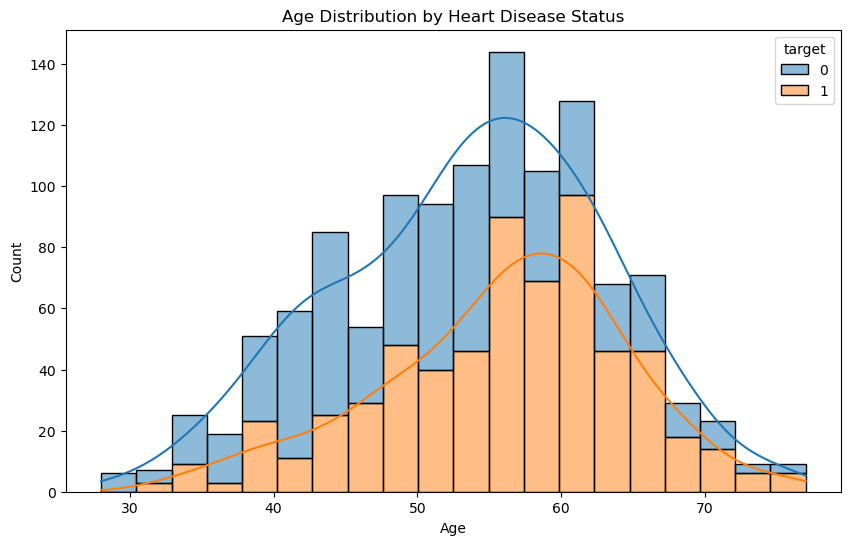

In [5]:
# Plotting Libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1 - Age Distribution by Heart Disease Status
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='target', multiple='stack', kde=True)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

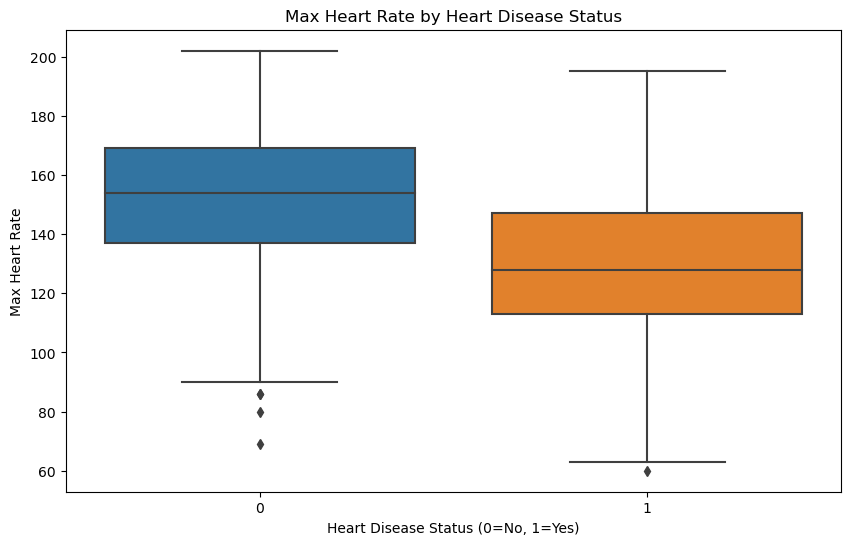

In [6]:
# Plot 2 - Max Heart Rate by Heart Disease Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='target', y='max heart rate')
plt.title('Max Heart Rate by Heart Disease Status')
plt.xlabel('Heart Disease Status (0=No, 1=Yes)')
plt.ylabel('Max Heart Rate')
plt.show()

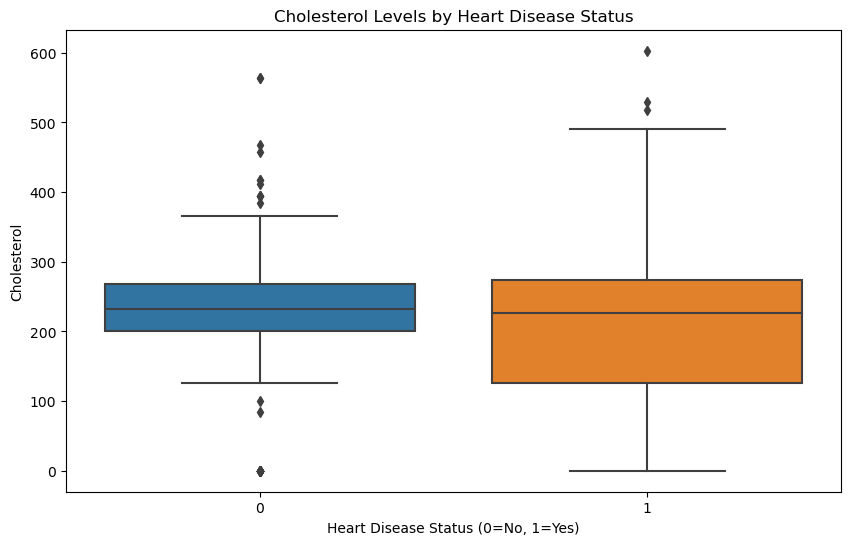

In [7]:
# Plot 3: Cholesterol Levels by Heart Disease Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='target', y='cholesterol')
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease Status (0=No, 1=Yes)')
plt.ylabel('Cholesterol')
plt.show()

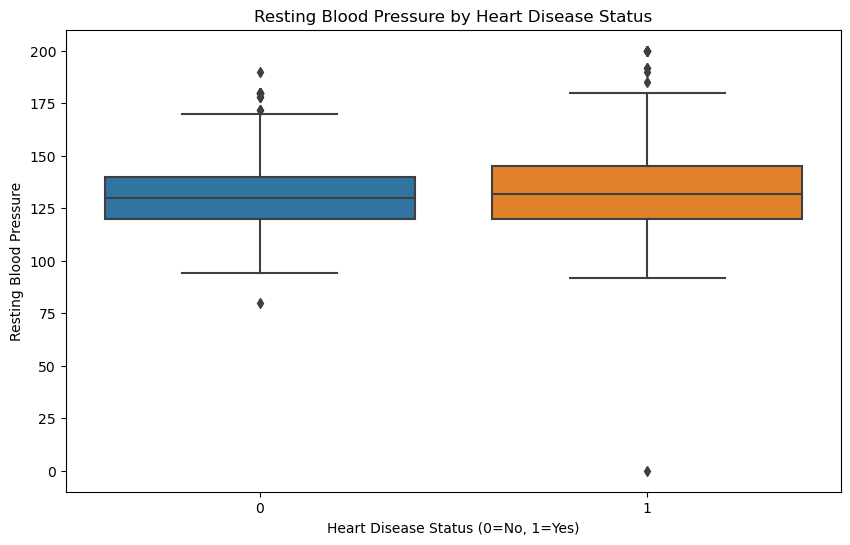

In [8]:
# Plot 4: Resting Blood Pressure by Heart Disease Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='target', y='resting bp s')
plt.title('Resting Blood Pressure by Heart Disease Status')
plt.xlabel('Heart Disease Status (0=No, 1=Yes)')
plt.ylabel('Resting Blood Pressure')
plt.show()

# Conclusion 

## 1) Age Distribution by Heart Disease Status:
This histogram shows the distribution of ages among individuals categorized by whether they have heart disease (target). The data indicates that older age groups are more likely to have heart disease, emphasizing age as a critical factor in heart disease risk assessment.

## 2) Max Heart Rate by Heart Disease Status:
The boxplot illustrates the variation in maximum heart rates during exercise, segmented by heart disease presence. Notably, individuals without heart disease tend to have higher maximum heart rates. This suggests that lower heart rates could be associated with increased cardiovascular risk.

## 3) Cholesterol Levels by Heart Disease Status:
This graph shows cholesterol levels among individuals with and without heart disease. Higher cholesterol levels are prevalent among those with heart disease, aligning with medical knowledge that high cholesterol is a significant risk factor for cardiovascular conditions.

## 4) Resting Blood Pressure by Heart Disease Status:
The final boxplot compares resting blood pressure values between individuals with and without heart disease. Higher median blood pressure in patients with heart disease supports the hypothesis that elevated blood pressure is a marker of increased heart disease risk.



Each of these graphs offers valuable insights into how various physiological and lifestyle factors correlate with the risk of heart disease, providing a foundational analysis for further predictive modeling. ​

# Milestone 2

## Feature Selection 

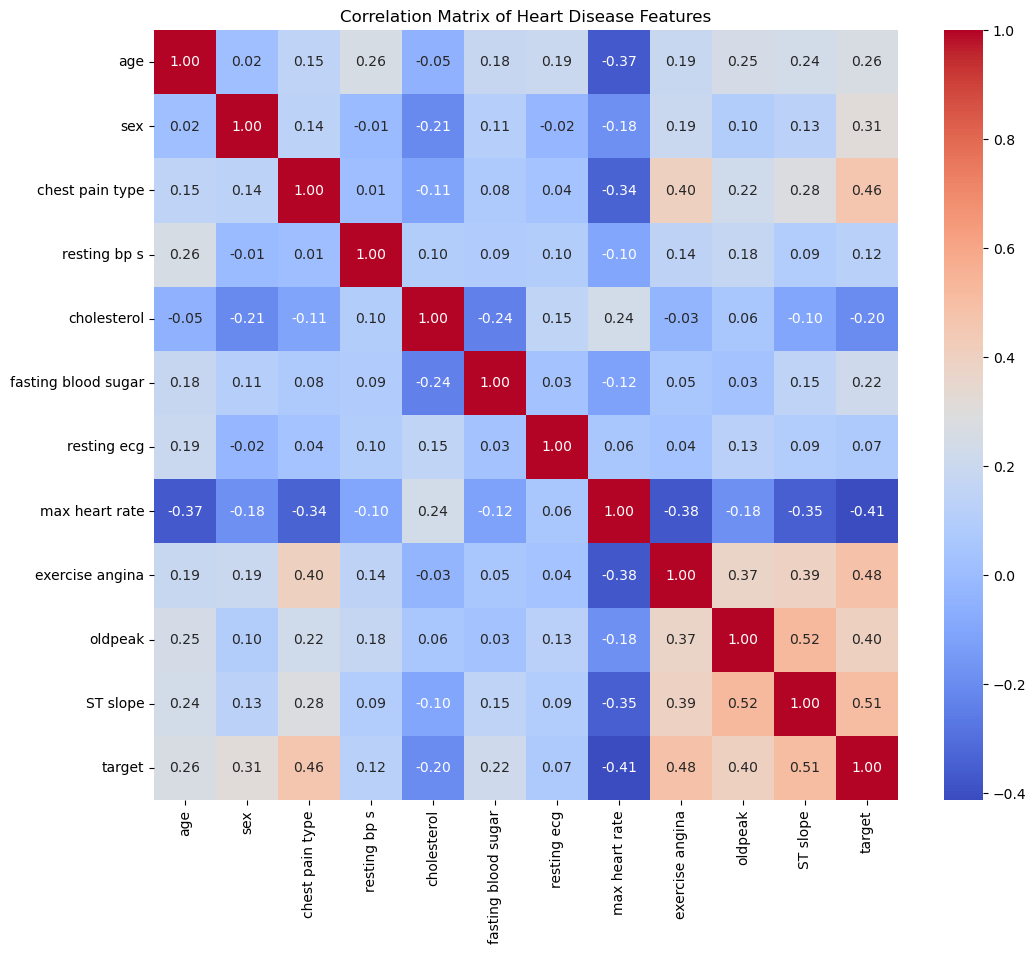

In [9]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Generate a heatmap of the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Heart Disease Features')
plt.show()

Most features do not have very high correlations with each other, which suggests minimal multicollinearity.
No two features show a correlation coefficient close to 1 or -1, which would typically indicate a need to drop one of the features to avoid redundancy.
Given this analysis, all features currently seem relevant and potentially useful for building the logistic regression model to predict the presence of heart disease. There are no obvious candidates for removal based on redundancy or lack of relevance.

## Data Extraction / Selection

In [10]:
# Standardize continuous, numeric features

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns to scale
columns_to_scale = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Apply scaling
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

 Logistic regression can be sensitive to the scale of the input features. Features with larger scales can dominate the training process, leading to an unstable model. Scaling ensures that each feature contributes equally to the decision boundary.

In [11]:
# Split data into training and test sets 

from sklearn.model_selection import train_test_split

# Define the features and target variable
X = data.drop('target', axis=1)  # Features
y = data['target']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

Splitting the data into training and test sets is imperative to being able to test our model against new data. This step will help prevent snooping in the future. 

## Transforming Features 

In [12]:
# Check for skew in the continuous variables we've already standardized

from scipy.stats import skew

columns_to_check = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Calculate skewness for each column
skewness = data[columns_to_check].apply(skew)

# Create a DataFrame to display skewness values
skewness_df = pd.DataFrame(skewness, columns=['Skewness']).reset_index()
skewness_df.rename(columns={'index': 'Feature'}, inplace=True)

# Print the skewness values
print(skewness_df)

          Feature  Skewness
0             age -0.191869
1    resting bp s  0.293092
2     cholesterol -0.780660
3  max heart rate -0.232804
4         oldpeak  1.092626


The feature 'oldpeak'is highly positively skewed, meaning the data in this variable is right-tailed. To correct, we will execute a log transformation to 'oldpeak'.

In [13]:
# Log transformation of 'oldpeak' that handles negative values in the 'oldpeak column'
import numpy as np
data['oldpeak_log'] = np.log(data['oldpeak'] + 1 + abs(data['oldpeak'].min()))

In [14]:
# Re-scaling the transformed 'oldpeak'
data['oldpeak_log'] = scaler.fit_transform(data[['oldpeak_log']])

## Missing Data / Dummy Variables

In [15]:
# Check for missing data 
missing_values = data.isnull().sum()

# Displaying the number of missing values per column
print(missing_values)

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
oldpeak_log            0
dtype: int64


The dataset is not missing any values, so no changes will be made to the dataset to account for missing data. If there were missing values in continuous columns, using the average or median rather than simply deleting the entry could be effective in this scenario. 

As for dummy variables, the dataset is already transformed in terms of converting categorical variables to numerical, so no transformations are needed. 

# Milestone 3.

In [16]:
# We will now build a logistic regression model to fit the standardized dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train the logistic regression model
logistic_model = LogisticRegression(random_state=49)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=49)

In [18]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       114
           1       0.84      0.83      0.84       124

    accuracy                           0.83       238
   macro avg       0.83      0.83      0.83       238
weighted avg       0.83      0.83      0.83       238



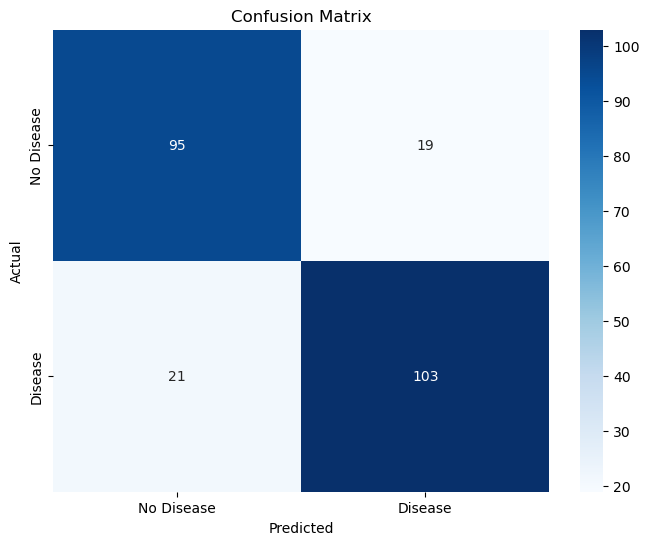

Accuracy: 83.19%


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the classification report
print("Classification Report:")
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

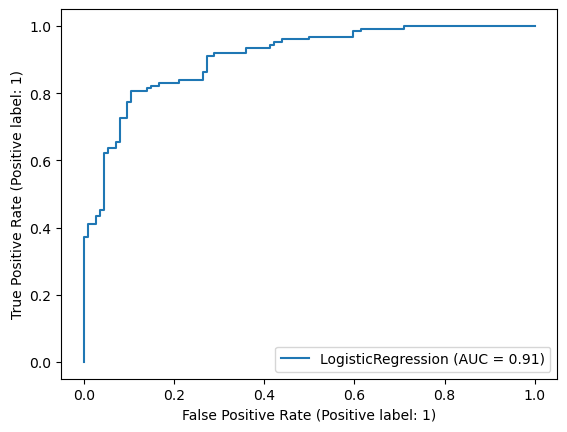

In [24]:
# Plot ROC curve 
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logistic_model, X_test, y_test)
plt.show()


### Interpretation

- **Accuracy**: 83.119%

- **Precision**: The proportion of positive identifications that were actually correct.
- Class 0: 82%
- Class 1: 84%

- **Recall**: The proportion of actual positives that were correctly identified.
- Class 0: 83%
- Class 1: 83%

- **F1-Score**: The harmonic mean of precision and recall, providing a balance between the two metrics.
- Class 0: 83%
- Class 1: 84%

Overall, the logistic regression model performs well in predicting whether an individual has heart disease with an accuracy of 83.19%. The balance between precision and recall suggests that the model is reliable in both identifying true cases and minimizing false positives / negatives. 